# Data Science Workflow

1. Loading and Visualizing the Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
from jupyterworkflow.data import load_data

In [3]:
data = load_data()
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


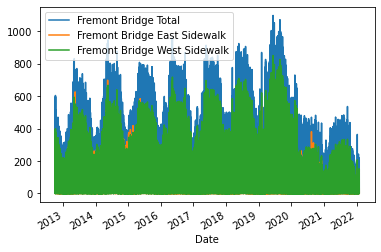

In [4]:
data.plot();

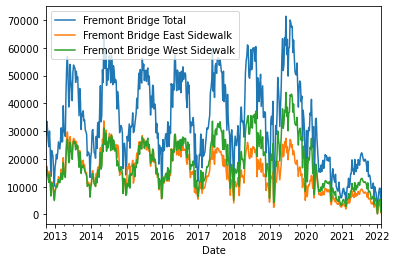

In [5]:
data.resample('W').sum().plot();

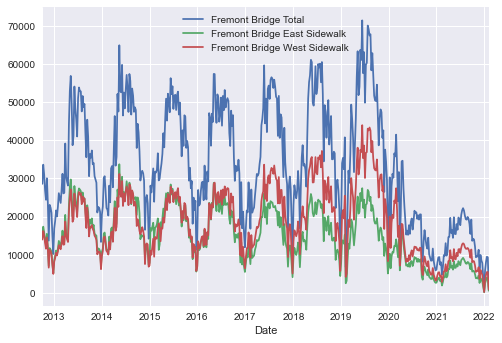

In [6]:
plt.style.use('seaborn')
data.resample('W').sum().plot();

2. Further Data Exploration

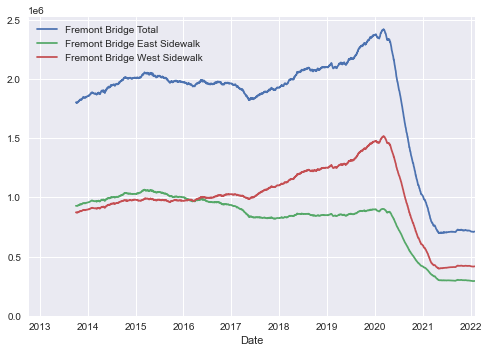

In [7]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

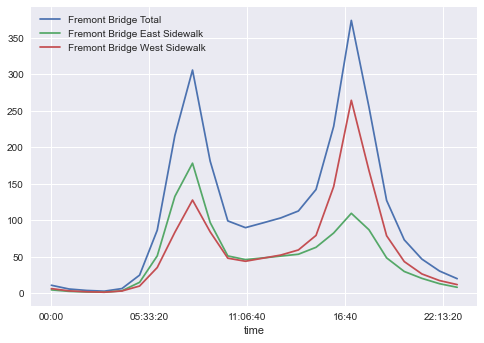

In [8]:
data.groupby(data.index.time).mean().plot();

In [9]:
pivoted = data.pivot_table('Fremont Bridge Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


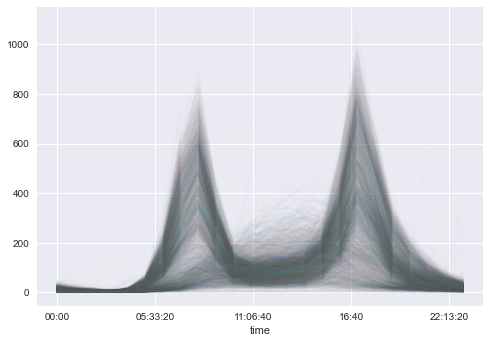

In [10]:
pivoted.plot(legend=False, alpha=0.01);

3. Version Control with Git and GitHub
    - Creating a repo in GitHub
    - Pushing this notebook to the repo

4. Working with Data and GitHub
    - Created the load_data function
    - Refactored the cells
    - Push the changes

5. Creating a python package
    - mkdir jupyterworkflow
    - code jupyterworkflow/__init__.py # creating a init file
    - code jupyterworkflow/data.py # creating the script to load data
    - push the changes

In [11]:
load_data?

Signature:
load_data(
    filename='Fremont.csv',
    url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',
    force_download=False,
)
Docstring:
Download and cache fremont data 
Parameters
----------
filename: string (optional)
    location to save the data
url: string (optional)
    web location of the data
force_download: bool (optional)
    if True, force redownload of data

Returns
-------
data: pandas.DataFrame
    The fremont bridge data
File:      a:\vs_code\python\ds_workflow\jupyter-ds-workflow\jupyterworkflow\data.py
Type:      function


In [12]:
load_data??

Signature:
load_data(
    filename='Fremont.csv',
    url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',
    force_download=False,
)
Source:   
def load_data(filename='Fremont.csv', url=FREEMONT_URL, force_download=False):
    """ Download and cache fremont data 
        Parameters
        ----------
        filename: string (optional)
            location to save the data
        url: string (optional)
            web location of the data
        force_download: bool (optional)
            if True, force redownload of data
        
        Returns
        -------
        data: pandas.DataFrame
            The fremont bridge data
    """
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    return data
File:      a:\vs_code\python\ds_workflow\jupyter-ds-workflow\jupyterworkflow\data.py
Type:      function
